In [1]:
import os
import scipy
import warnings
import math

import pandas            as pd
import matplotlib.pyplot as plt
import numpy             as np
import seaborn           as sns
import scipy.stats       as stats

from scipy.optimize    import curve_fit
from scipy.stats.stats import pearsonr
from datetime       import datetime

from tqdm import tqdm_notebook as tqdm

def func_linear(x, k, c):
    return k*x+c

def func_gauss(x, sigm, mu, A):
    return np.exp(-((x-mu)**2)/(2*sigm**2))*A

warnings.simplefilter('ignore')
plt.style.available
plt.style.use('seaborn-ticks')  # Красивые графики

# Метод наложения эпох

## Суточная волна

### по очищенным и поправленным данным (часовые точки)

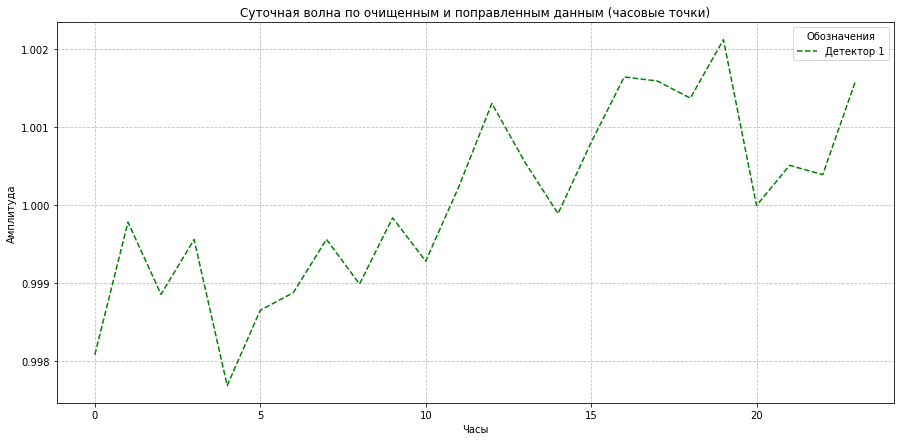

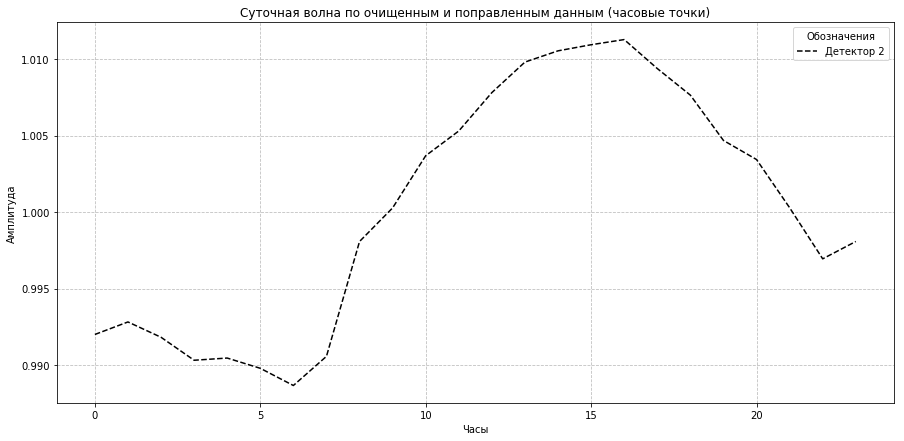

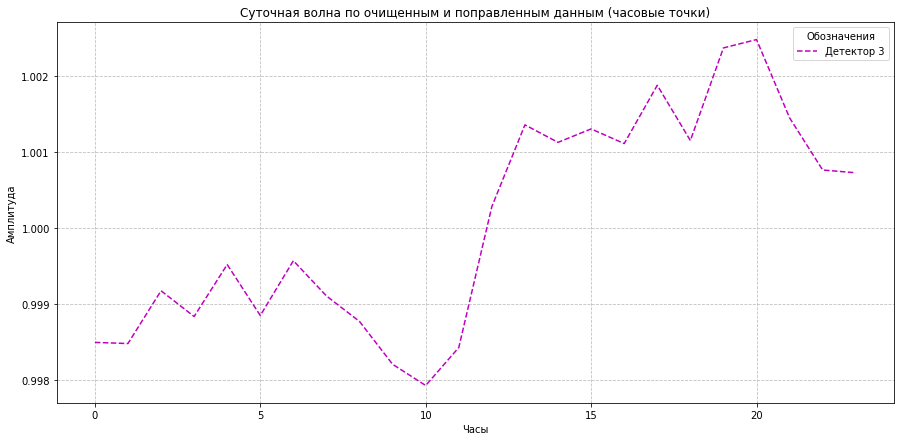

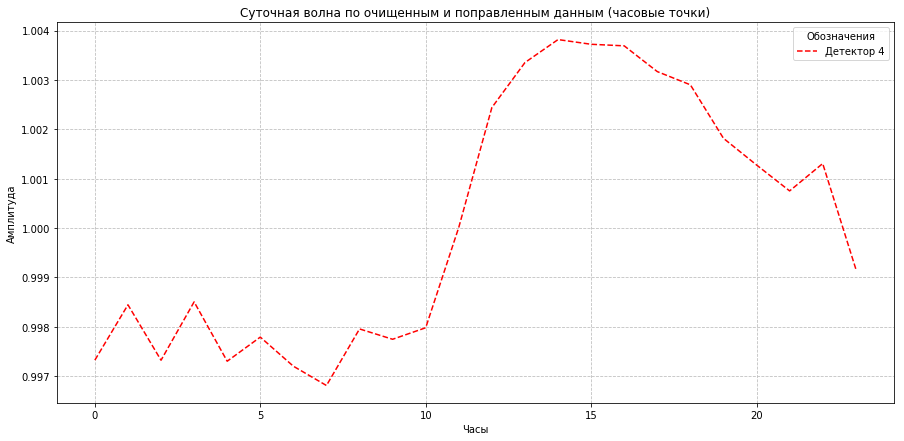

In [70]:
new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity', 'D', 'M', 'Y', 'H', 'date']
Itog = pd.read_csv(r"D:\variations\MEPHI10-18\1h\Result_corrected_step3_average_1h.txt", names = new_names, delim_whitespace = True)
Itog['date'] = pd.to_datetime(Itog['date']) 
day_wave = pd.DataFrame()
for i in range(24):
    for j in range(1,5,1):
        day_wave.loc[i,j] =  Itog[Itog['H'] == i]['Neutr%s' %(j)].mean()

#print(day_wave)

s = ['g','k','m','r']
for i in range(1,5,1):
    plt.figure(figsize = (15, 7))
    plt.grid(True, linestyle='--', color='0.75')
    plt.plot(day_wave[i], '--', color = '%s' %(s[i-1]), label = 'Детектор %s' %i)
    
    plt.legend(title='Обозначения')
    plt.xlabel('Часы')
    plt.ylabel('Амплитуда')
    plt.title('Суточная волна по очищенным и поправленным данным (часовые точки)')

### по неочищенным данным данным (часовые точки)

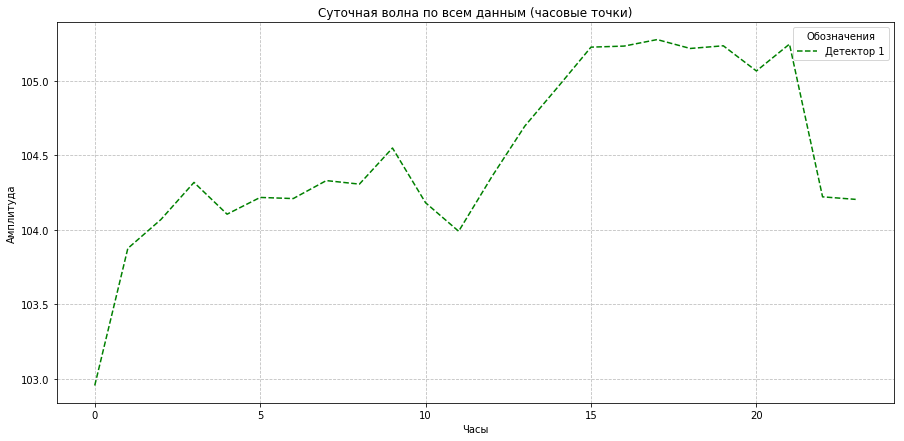

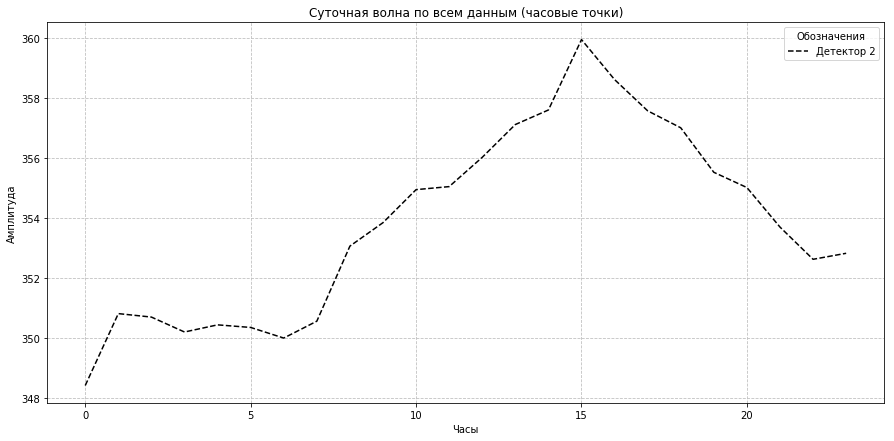

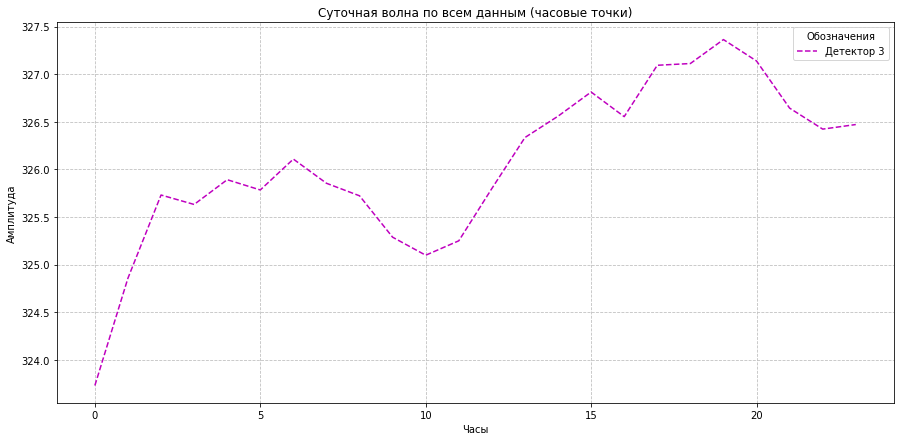

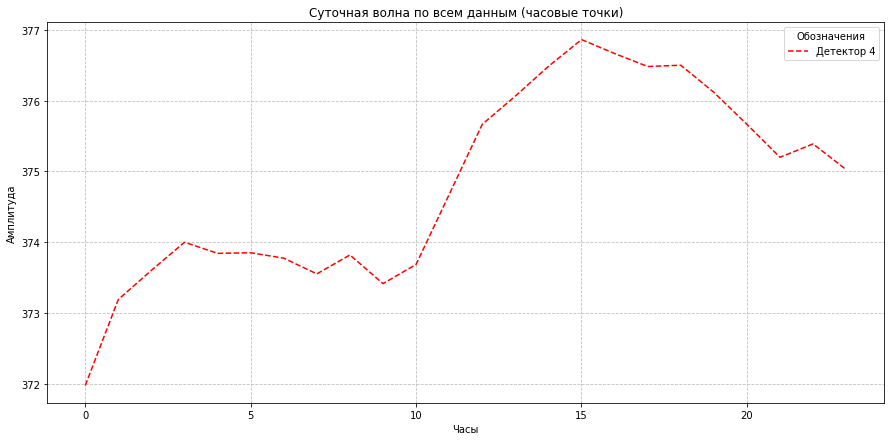

In [71]:
new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity', 'D', 'M', 'Y', 'H', 'date']
Itog = pd.read_csv(r"D:\variations\MEPHI10-18\1h\Result_onlydata_1h.txt", names = new_names, delim_whitespace = True)
Itog['date'] = pd.to_datetime(Itog['date']) 
day_wave = pd.DataFrame()
for i in range(24):
    for j in range(1,5,1):
        day_wave.loc[i,j] =  Itog[Itog['H'] == i]['Neutr%s' %(j)].mean()

#print(day_wave)

s = ['g','k','m','r']
for i in range(1,5,1):
    plt.figure(figsize = (15, 7))
    plt.grid(True, linestyle='--', color='0.75')
    plt.plot(day_wave[i], '--', color = '%s' %(s[i-1]), label = 'Детектор %s' %i)
    
    plt.legend(title='Обозначения')
    plt.xlabel('Часы')
    plt.ylabel('Амплитуда')
    plt.title('Суточная волна по всем данным (часовые точки)')

### по не очищенным данным (получасовые точки)

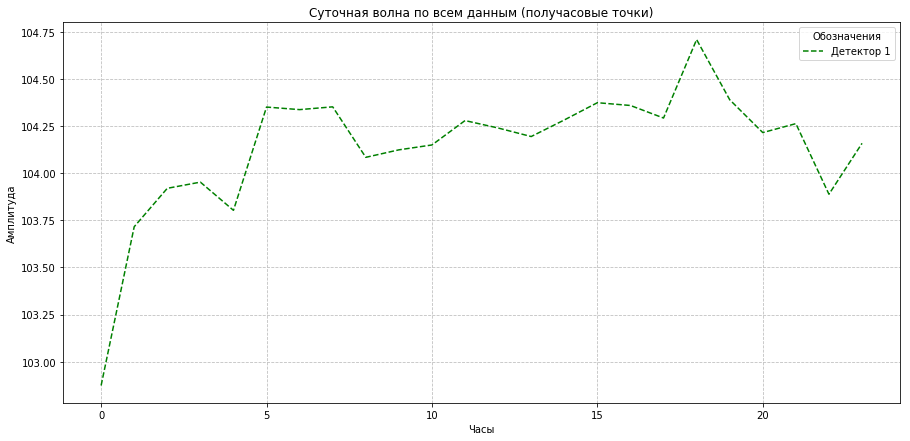

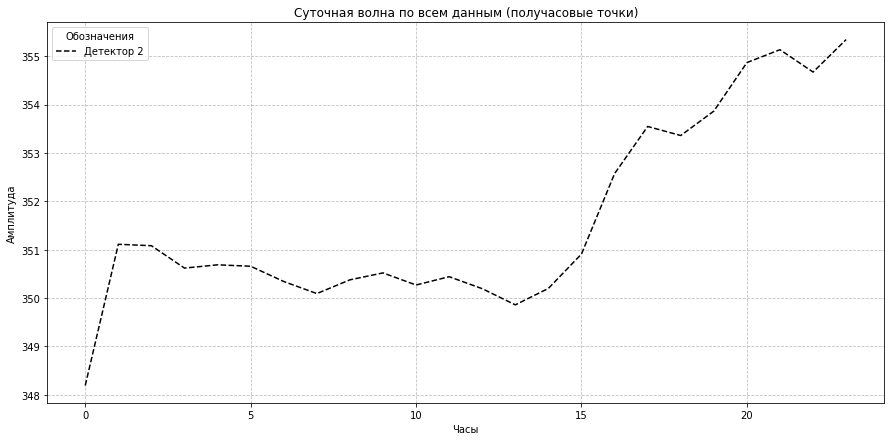

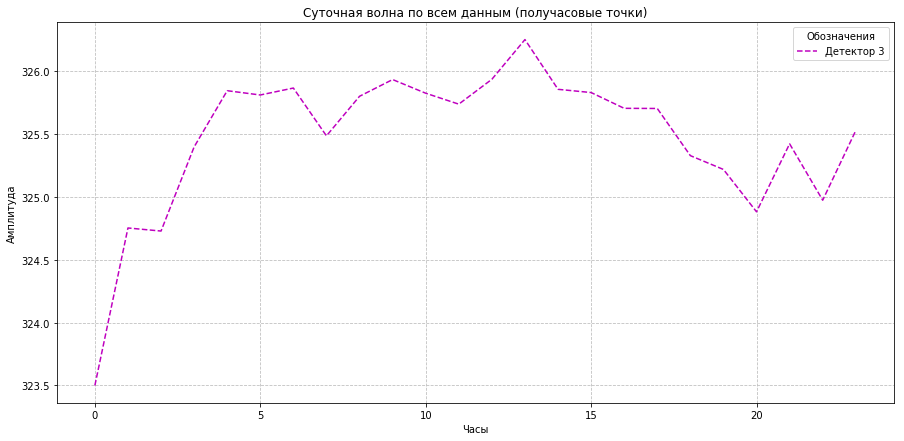

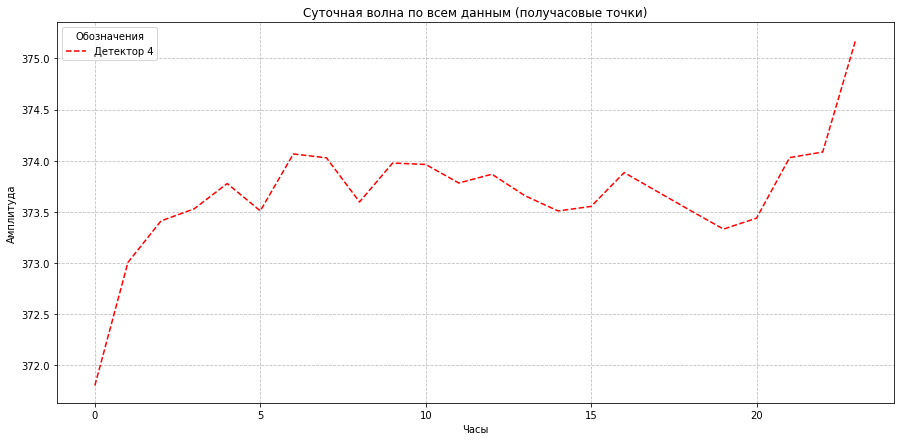

In [72]:
new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity', 'D', 'M', 'Y', 'H', 'date']
Itog = pd.read_csv(r"D:\variations\MEPHI10-18\30min\Result_onlydata_30min.txt", names = new_names, delim_whitespace = True)
Itog['date'] = pd.to_datetime(Itog['date']) 
day_wave = pd.DataFrame()
for i in range(24):
    for j in range(1,5,1):
        day_wave.loc[i,j] =  Itog[Itog['H'] == i]['Neutr%s' %(j)].mean()

#print(day_wave)

s = ['g','k','m','r']
for i in range(1,5,1):
    plt.figure(figsize = (15, 7))
    plt.grid(True, linestyle='--', color='0.75')
    plt.plot(day_wave[i], '--', color = '%s' %(s[i-1]), label = 'Детектор %s' %i)
    
    plt.legend(title='Обозначения')
    plt.xlabel('Часы')
    plt.ylabel('Амплитуда')
    plt.title('Суточная волна по всем данным (получасовые точки)')

## Годовая волна

### Не очищенные данные (усреднение за день из одного часа)

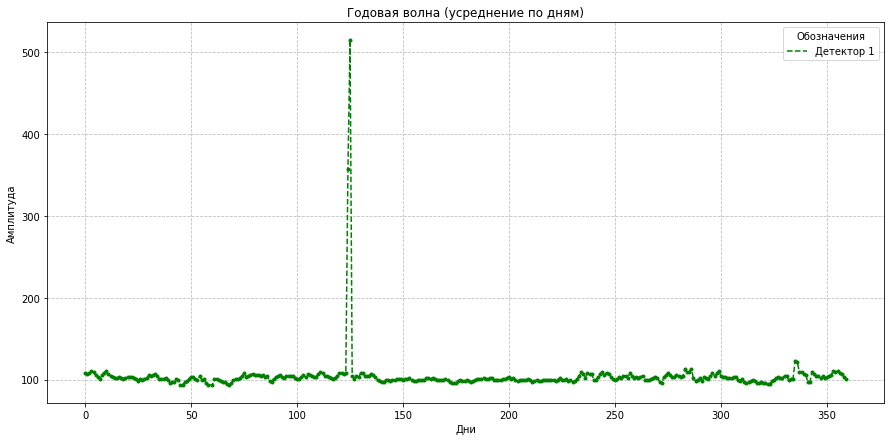

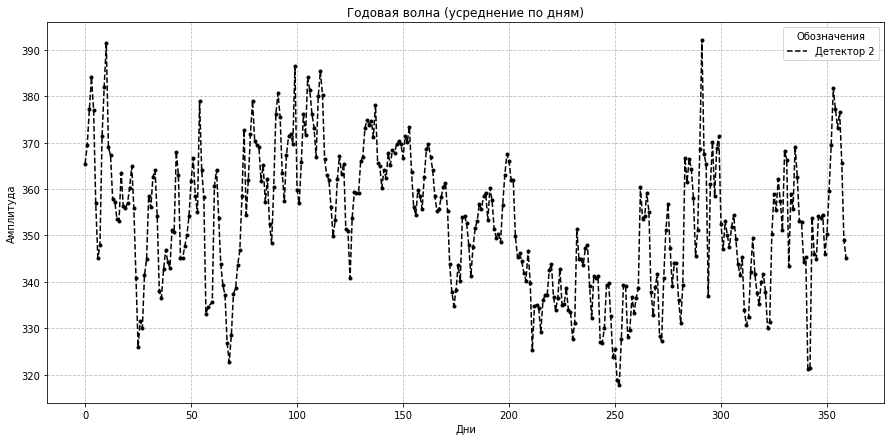

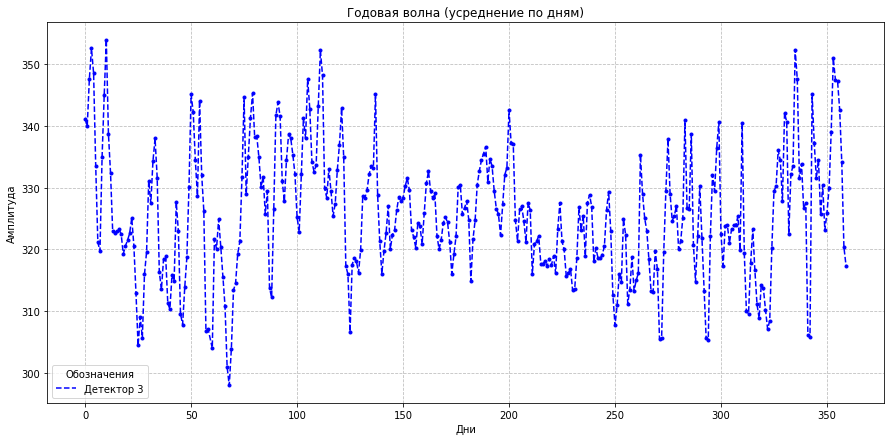

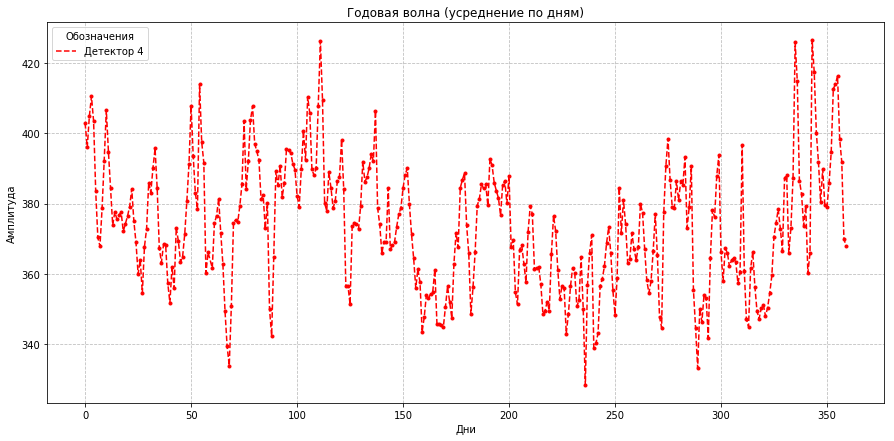

In [6]:
new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity', 'D', 'M', 'Y', 'H', 'date']
Itog = pd.read_csv(r"D:\variations\MEPHI10-18\1h\Result_onlydata_1h.txt", names = new_names, delim_whitespace = True)
Itog['date'] = pd.to_datetime(Itog['date'])
# Для часового разбиения
year_wave = pd.DataFrame()
index = 0
for i in tqdm( range(1,13,1) ):
    for j in range(1,31,1):
        for l in range (1,5,1):
            year_wave.loc[index,l] =  Itog[Itog['M'] == i][Itog['D'] == j]['Neutr%s' %(l)].mean()
        index+=1
year_wave.dropna(inplace = True)


s = ['g','k','blue','r']
for i in range(1,5,1):
    plt.figure(figsize = (15, 7))
    plt.plot(year_wave[i], '--', color = '%s' %(s[i-1]), label = 'Детектор %s' %i)
    plt.grid(True, linestyle='--', color='0.75')
    plt.legend(title='Обозначения')
    plt.plot(year_wave[i], '.', color = '%s' %(s[i-1]))
    plt.xlabel('Дни')
    plt.ylabel('Амплитуда')
    plt.title('Годовая волна (усреднение по дням)')

### Очищенные данные (усреднение за день из одного часа)

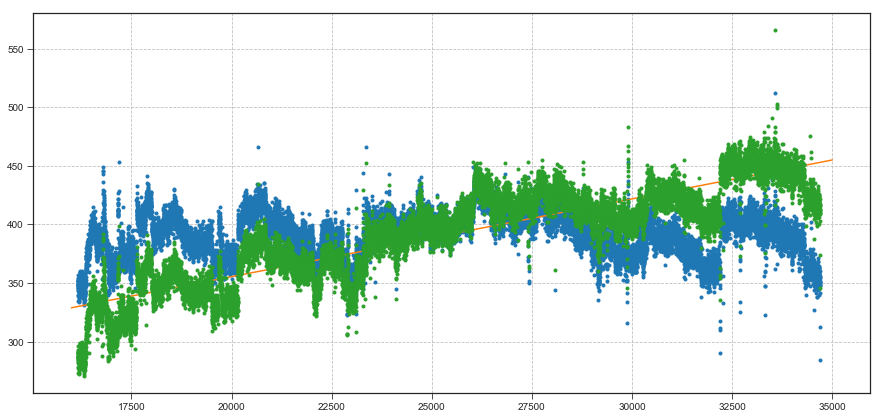

In [151]:
x = Itog[Itog['date']>='2014-09-01']['IND']
y = Itog[Itog['date']>='2014-09-01']['Neutr4']
z = np.polyfit(x,y,1)
plt.figure(figsize = (15, 7)) 
arr1 = np.linspace(16000, 35000, 1000)
plt.plot(y - z[0]*x + z[0]*np.mean(x), '.')
plt.plot(arr1, z[0]*arr1+z[1])
plt.grid(True, linestyle='--', color='0.75')
plt.plot(y.index, y, '.')

(37137, 12)
(37049, 12)


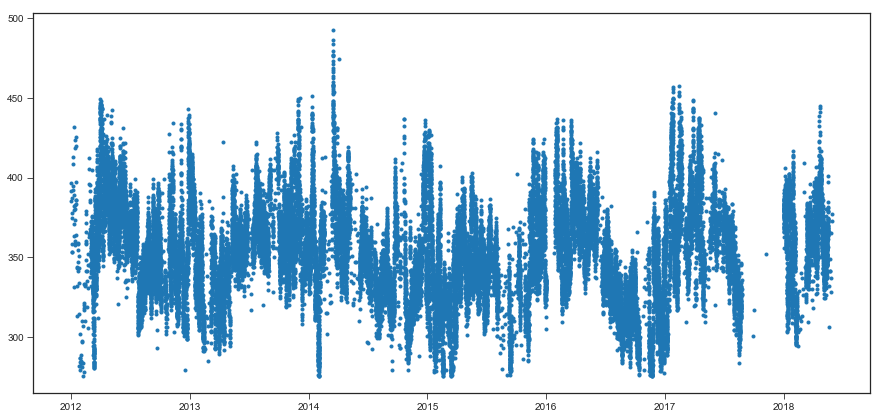

In [39]:
# Чтение данных без выбросов
new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity', 'D', 'M', 'Y', 'H','date']
Itog = pd.read_csv(r"D:\variations\MEPHI10-18\1h\Result_corrected_step1_1h.txt", 
                   names = new_names, 
                   delim_whitespace = True)
Itog['date'] = pd.to_datetime(Itog['date'])
print(Itog.shape)
Itog = Itog[Itog['Neutr2']>275]
print(Itog.shape)
plt.figure(figsize = (15, 7))
plt.plot(Itog['date'], Itog['Neutr2'], '.')

In [56]:
# Чтение данных без выбросов
new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity', 'D', 'M', 'Y', 'H','date']
Itog = pd.read_csv(r"D:\variations\MEPHI10-18\1h\Result_onlydata_1h.txt", 
                   names = new_names, 
                   delim_whitespace = True)
Itog[Itog['Y']==2017][Itog['M']==9][Itog['D']==13]
# Константное давление => Выброшен весь день, кроме 1 отсчета
#Верно для 13.09.2012
#Верно для 13.09.2013
#Верно для 13.09.2014

# Что с 2017 годом
# В итоовом сете отсутствует эта дата


,Neutr1,Neutr2,Neutr3,Neutr4,Pressure,"T, C",Humidity,D,M,Y,H,date
35387,122.833333,334.250000,338.083333,437.750000,744.5834,19.90137,3.871952,13.0,9.0,2017.0,0.0,2017-09-13 00:00:00
35388,122.500000,346.250000,339.500000,420.083333,744.3455,18.71778,3.849250,13.0,9.0,2017.0,1.0,2017-09-13 01:00:00
35389,125.333333,350.583333,343.666667,429.500000,744.2432,18.61701,3.779172,13.0,9.0,2017.0,2.0,2017-09-13 02:00:00
35390,124.833333,353.750000,346.750000,435.916667,744.0167,18.85485,3.829661,13.0,9.0,2017.0,3.0,2017-09-13 03:00:00
35391,130.500000,345.583333,338.166667,439.166667,743.6854,18.05791,3.887652,13.0,9.0,2017.0,4.0,2017-09-13 04:00:00
35392,121.250000,345.083333,337.750000,427.166667,743.3329,17.97220,3.926783,13.0,9.0,2017.0,5.0,2017-09-13 05:00:00
35393,127.333333,352.583333,345.666667,441.666667,742.7603,17.26852,3.903664,13.0,9.0,2017.0,6.0,2017-09-13 06:00:00
35394,124.250000,346.083333,354.666667,431.416667,742.2984,16.74972,3.874188,13.0,9.0,2017.0,7.0,2017-09-13 07:00:00
35395,127.666667,359.083333,350.583333,446.500000,741.6926,17.29041,3.887507,13.0,9.0,2017.0,8.0,2017-09-13 08:00:00
35396,121.727273,369.909091,347.545455,437.454545,740.8524,18.45638,3.889325,13.0,9.0,2017.0,9.0,2017-09-13 09:00:00


In [57]:
# Чтение данных без выбросов
new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity', 'D', 'M', 'Y', 'H','date']
Itog = pd.read_csv(r"D:\variations\MEPHI10-18\1h\Result_corrected_step1_1h.txt", 
                   names = new_names, 
                   delim_whitespace = True)
Itog['date'] = pd.to_datetime(Itog['date'])
Itog[Itog['Y']==2017][Itog['M']==9][Itog['D']==13]

,Neutr1,Neutr2,Neutr3,Neutr4,Pressure,"T, C",Humidity,D,M,Y,H,date


Text(0.5,1,'График зависимости температуры от времени')

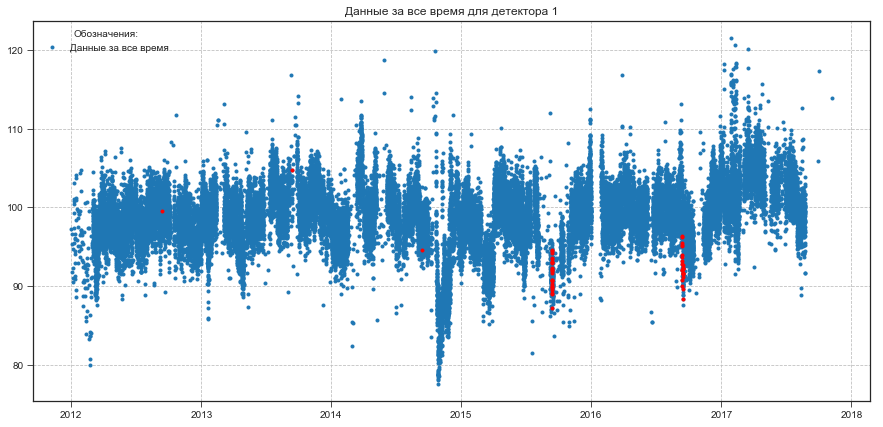

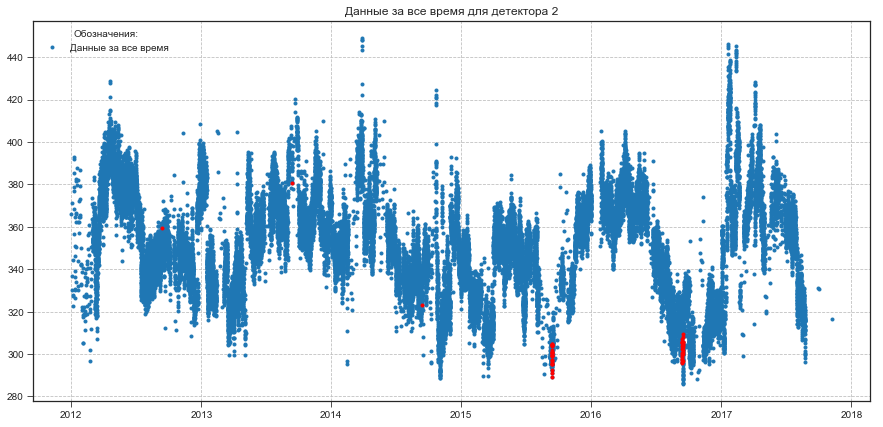

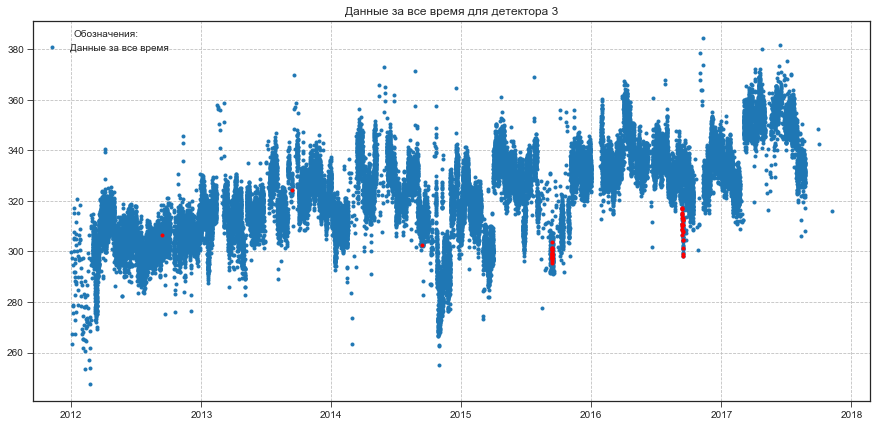

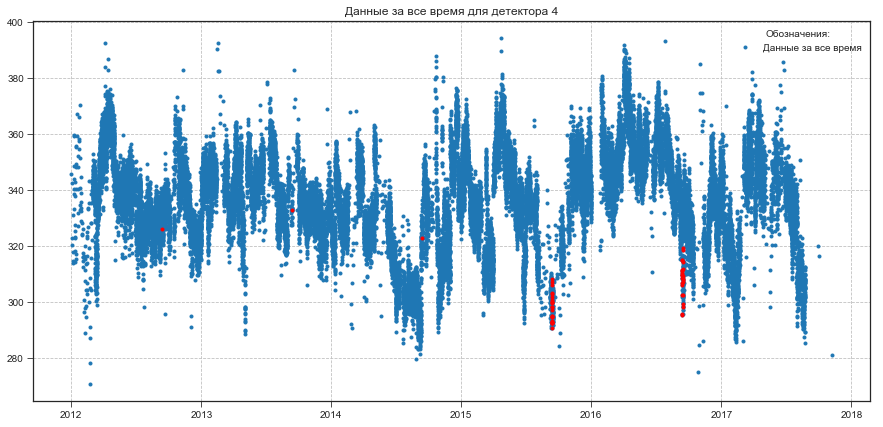

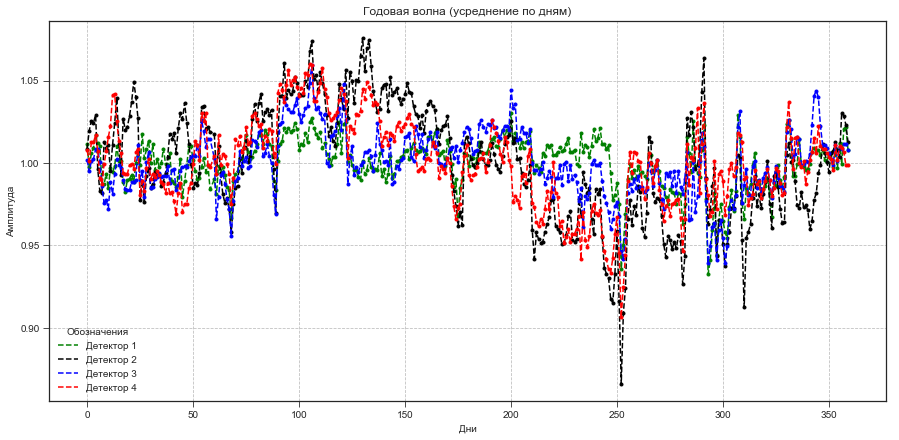

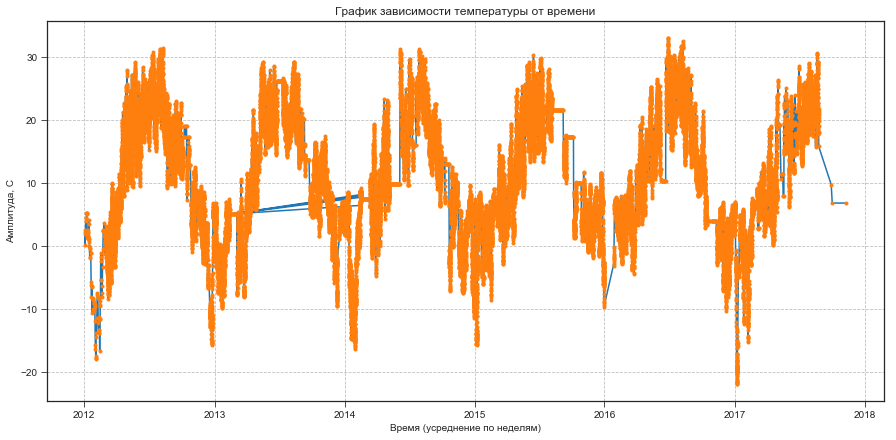

In [53]:
# Чтение данных без выбросов
new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity', 'D', 'M', 'Y', 'H','date']
Itog = pd.read_csv(r"D:\variations\MEPHI10-18\1h\Result_corrected_step1_1h.txt", 
                   names = new_names, 
                   delim_whitespace = True)
Itog['date'] = pd.to_datetime(Itog['date'])

#Чтение коэффициентов для поправки данных
allcoeff = pd.read_csv(r"D:\variations\MEPHI10-18\1h\barometric_coeff.txt", 
                       names = ['1', 'date', '2', '3', '4'], 
                       delim_whitespace = True, 
                       usecols = [0,2,3,5,7])
allcoeff['date'] = pd.to_datetime(allcoeff['date'])
Itog = Itog.drop(Itog[Itog['Y'] == 2018].index) 

##############
x = Itog[Itog['date']>='2014-09-01'].index
y = Itog[Itog['date']>='2014-09-01']['Neutr4']
z = np.polyfit(x,y,1)
Itog.loc[Itog['date']>='2014-09-01','Neutr4'] = y - z[0]*x + z[0]*( 
    np.mean(x) - np.mean(Itog[Itog['date']<'2014-09-01']['Neutr4'].index) 
)
##############
# Сглаживание
for i in ('Neutr1', 'Neutr2', 'Neutr3', 'Neutr4'):
    Itog[i] = Itog[i].rolling(window = 6,win_type = 'blackmanharris').mean()
Itog.dropna(inplace = True)

#Поправка на барометрический коэффициент
for i in range (0,allcoeff.shape[0]-1,1):
    for j in range(1,5,1):
        usl = allcoeff['date'][i]  
        k   = allcoeff['%s' %j][i]
        y   = Itog[Itog['M'] == usl.month][Itog['Y'] == usl.year]['Neutr%s'%j]
        x   = Itog[Itog['M'] == usl.month][Itog['Y'] == usl.year]['Pressure' ]
        Itog.loc [(Itog['M'] == usl.month) & (Itog['Y'] == usl.year),'Neutr%s'%j] = y - k*x*y + k*x.mean()*y

Itog = Itog[Itog['Neutr2']>275]
#for i in range (4,5,1):
#    for j in range(2012,2018,1):
#        plt.figure(figsize = (15, 7)) 
#        plt.title ('Данные за все время для детектора %s' %i) 
#        plt.plot  (Itog[Itog['Y'] == j]['date'], Itog[Itog['Y'] == j]['Neutr%s'%i], '.', label = 'Данные за %s'%j)
#        plt.grid  (True, linestyle='--', color='0.75') 
#        plt.legend(title = 'Обозначения:')
        

#Годовая волна в записи по дням
year_wave = pd.DataFrame()
index = 0
arr_new = []
for i in tqdm( range(1,13,1) ):
    for j in range(1,31,1):
        for l in range (1,5,1):
            year_wave.loc[index,l] = np.mean( Itog[Itog['M'] == i][Itog['D'] == j]['Neutr%s' %(l)] )
        if index == 252: arr_new = Itog[Itog['M'] == i][Itog['D'] == j]
        index+=1
        
for i in range (1,5,1):
    plt.figure(figsize = (15, 7)) 
    plt.title ('Данные за все время для детектора %s' %i) 
    plt.plot  (Itog['date'], Itog['Neutr%s'%i], '.', label = 'Данные за все время')
    plt.grid  (True, linestyle='--', color='0.75') 
    plt.legend(title = 'Обозначения:')
    plt.plot(arr_new['date'], arr_new['Neutr%s'%i], 'r.')    
    

s = ['g','k','blue','r']
plt.figure(figsize = (15, 7))
plt.grid(True, linestyle='--', color='0.75')
for i in range(1,5,1):
    plt.plot(year_wave[i]/year_wave[i].mean(), '--', color = '%s' %(s[i-1]), label = 'Детектор %s' %i)
    plt.legend(title='Обозначения')
    plt.plot(year_wave[i]/year_wave[i].mean(), '.', color = '%s' %(s[i-1]), label = '')
    plt.xlabel('Дни')
    plt.ylabel('Амплитуда')
    plt.title('Годовая волна (усреднение по дням)')   
 
    
Itog = Itog.set_index('date')    
Itog.dropna(inplace = True)
Itog.resample('D').mean()
plt.figure(figsize = (15, 7)) 
plt.plot(Itog.index, Itog['T, C'], '-')
plt.plot(Itog.index, Itog['T, C'], '.')
plt.grid(True, linestyle='--', color='0.75')
plt.xlabel('Время (усреднение по неделям)')
plt.ylabel('Амплитуда, C')
plt.title('График зависимости температуры от времени')

In [49]:
year_wave[year_wave.index>=250]

,1,2,3,4
250,97.638408,336.356466,314.209752,324.853422
251,96.340046,321.568404,311.641166,317.455207
252,92.486337,303.854791,304.763206,304.390614
253,93.914404,319.001811,303.143218,310.622514
254,95.748139,324.331990,307.077340,317.134147
255,97.864477,339.037592,316.138208,332.163724
256,98.754867,343.055185,317.821438,338.079365
257,97.904326,337.812562,316.517557,333.741817
258,98.422671,341.725918,318.881465,338.010329
259,97.888082,339.941587,316.987356,337.783001


In [ ]:
# Годовая волна в записи по неделям    
    
Itog = Itog.resample('W').mean()

year_wave = pd.DataFrame()
for i in range (1,Itog.index.week.max()+1,1):
    for j in range (1,5,1):
        year_wave.loc[i, j]  = Itog.loc[Itog.index.week == i]['Neutr%s'%j].mean()

plt.figure(figsize = (15, 7)) 
plt.plot(Itog.index, Itog['T, C'], '-')
plt.plot(Itog.index, Itog['T, C'], '.')
plt.grid(True, linestyle='--', color='0.75')
plt.xlabel('Время (усреднение по неделям)')
plt.ylabel('Амплитуда, C')
plt.title('График зависимости температуры от времени')

s = ['g','k','blue','r']
plt.figure(figsize = (15, 7))
plt.grid(True, linestyle='--', color='0.75')
for i in range(1,5,1):
    
    plt.plot(year_wave[i]/year_wave[i].mean(), '--', color = '%s' %(s[i-1]), label = 'Детектор %s' %i)
    plt.legend(title='Обозначения')
    plt.plot(year_wave[i]/year_wave[i].mean(), '.', color = '%s' %(s[i-1]), label = '')
    plt.xlabel('Недели')
    plt.ylabel('Амплитуда')
    plt.title('Годовая волна (усреднение по неделям)') 

plt.figure(figsize = (15, 7))    
plt.plot(year_wave[1]/year_wave[1].mean(),'.')
plt.plot(year_wave[1]/year_wave[1].mean(),'--')
plt.grid(True, linestyle='--', color='0.75')

### Распределение амплитуд темпа счета 

Границы для 3 сигм
81.75 116.0
260.8 440.27272727272725
249.2 396.83333333333326
253.0 522.75


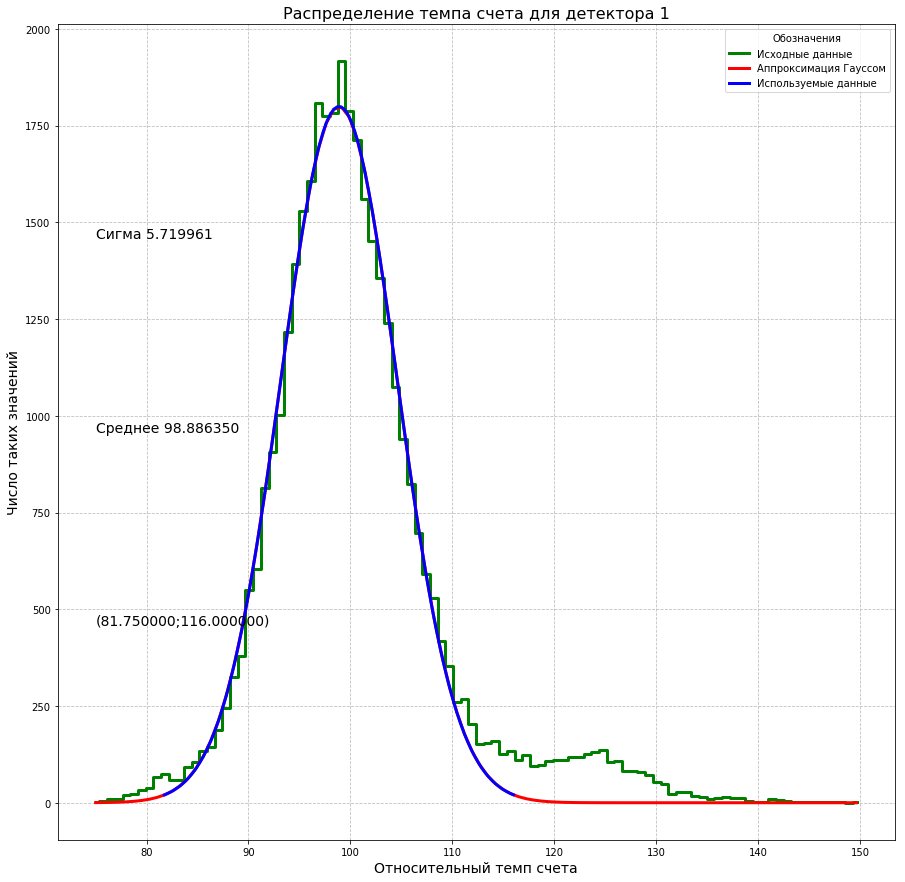

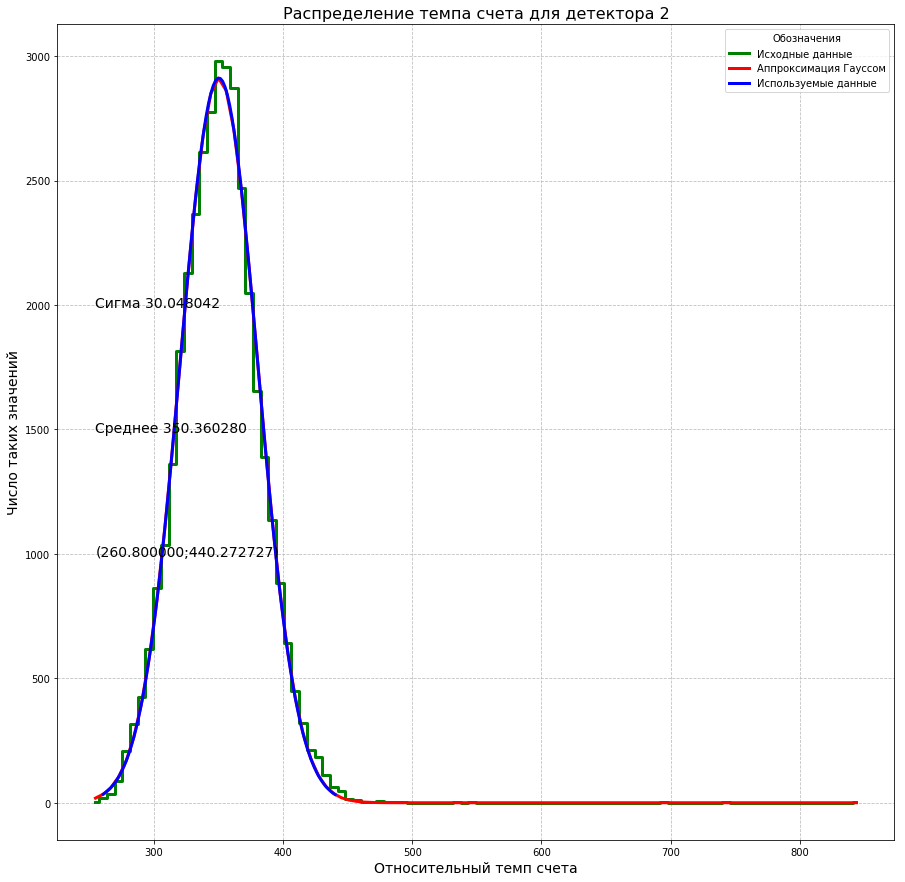

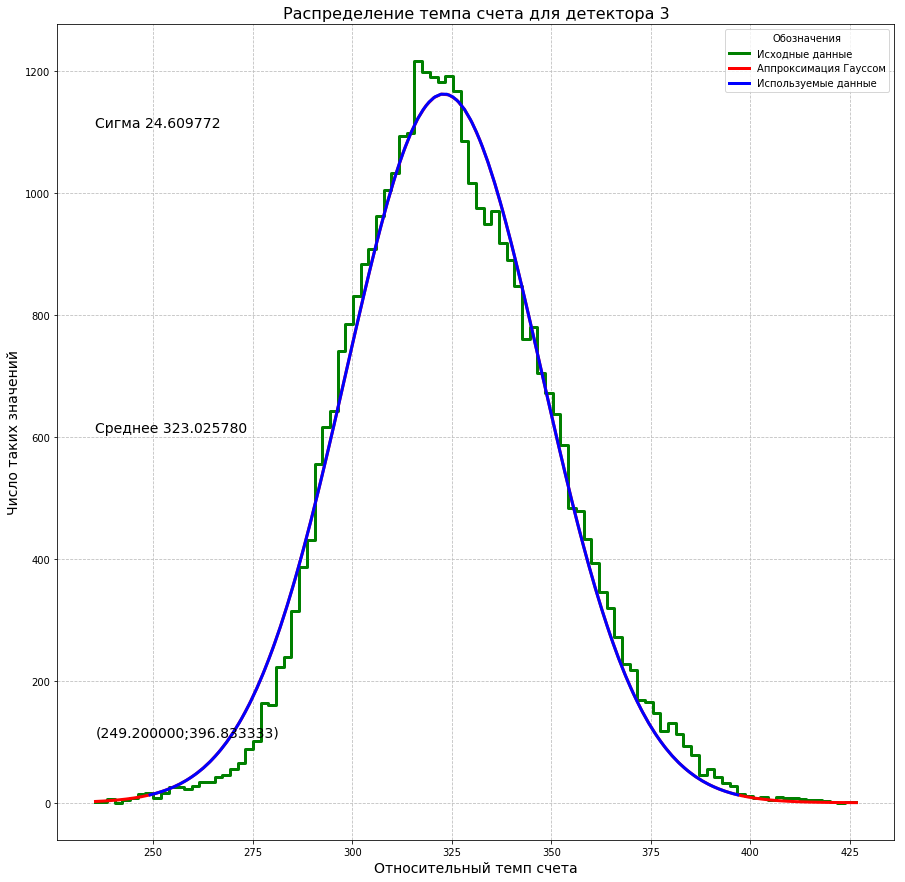

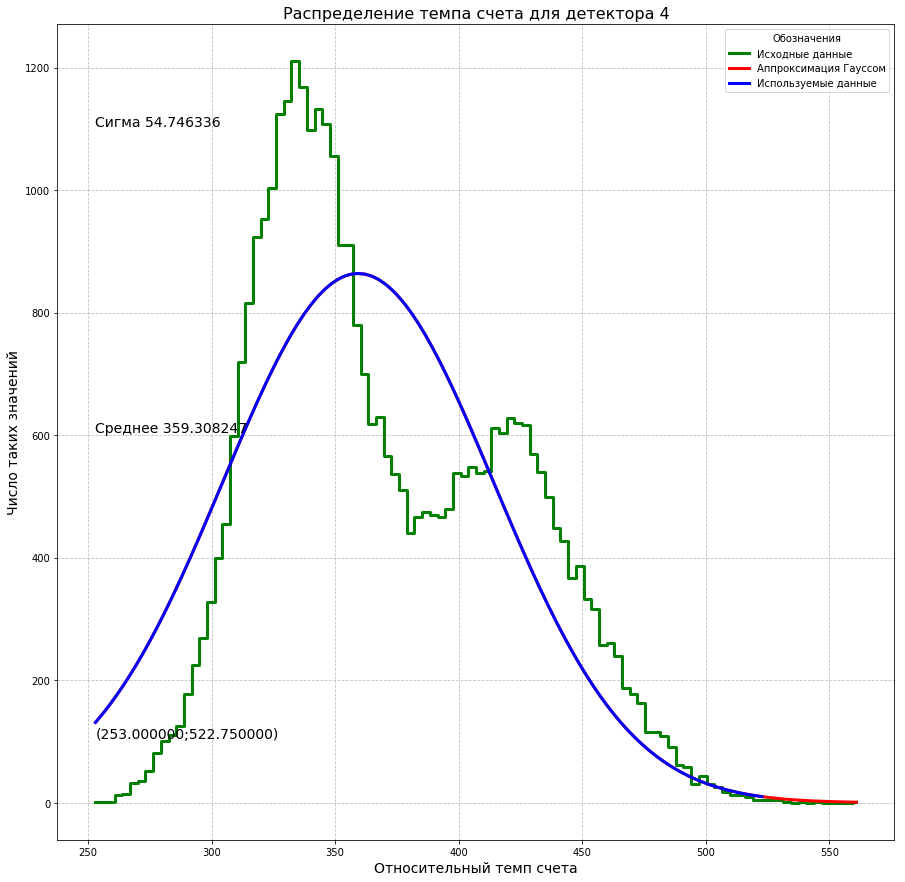

In [8]:
new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity', 'D', 'M', 'Y', 'H','date']
Itog = pd.read_csv(r"D:\variations\MEPHI10-18\1h\Result_corrected_step1_1h.txt", names = new_names, delim_whitespace = True)
Itog['date'] = pd.to_datetime(Itog['date'])
# Для часового разбиения
allcoeff = pd.read_csv(r"D:\variations\MEPHI10-18\1h\barometric_coeff.txt", names = ['bar1', 'date', 'bar2', 'bar3', 'bar4'], delim_whitespace = True, 
                       columns = [0,2,3,5,6])
print(allcoeff)
otrez = pd.DataFrame()

print('Границы для 3 сигм')
#Постороение гистограмм по темпу счета
for i in range(1,5,1):
    plt.figure(figsize = (15, 15))
    plt.grid(True, linestyle='--', color='0.75')
    plt.xlabel('Относительный темп счета', size = '14')
    plt.ylabel('Число таких значений', size = '14')
    plt.title('Распределение темпа счета для детектора %s' %i, size = '16')
    xdata=np.linspace(Itog['Neutr%s'%i].min(), Itog['Neutr%s'%i].max(), num=100)
    ydata=(Itog['Neutr%s'%i].value_counts(normalize=False, sort=False, ascending = True, bins=100, dropna=False))
    plt.step(xdata, ydata, 'g', label = u'Исходные данные', where = 'mid', linewidth = 3)    
    
    #Все данные
    newx = np.linspace(Itog['Neutr%s'%i].min(), Itog['Neutr%s'%i].max(), num=100)
    popt, pcov = curve_fit(func_gauss, xdata, ydata, p0 = (ydata.std(), xdata.mean(), ydata.max()))
    plt.plot(newx, func_gauss(newx, *popt), 'r-', label=u'Аппроксимация Гауссом',linewidth = 3)  
    
    #Скорректированные данные
    beg = Itog[Itog['Neutr%s'%i]>=(popt[1]-3*math.fabs(popt[0]))][Itog['Neutr%s'%i]<=(popt[1]+3*math.fabs(popt[0]))]['Neutr%s'%i].min()
    end = Itog[Itog['Neutr%s'%i]>=(popt[1]-3*math.fabs(popt[0]))][Itog['Neutr%s'%i]<=(popt[1]+3*math.fabs(popt[0]))]['Neutr%s'%i].max()
    otrez.loc['beg', i] = beg
    otrez.loc['end', i] = end
    newx = np.linspace(beg, end, num=100)
    plt.plot(newx, func_gauss(newx, *popt), 'b-', label=u'Используемые данные', linewidth = 3)
    plt.legend(title='Обозначения')
    
    #Доп инфа
    plt.text(xdata[0],ydata.max()/2+500, 'Сигма %f' %(math.fabs(popt[0])),size = '14')
    plt.text(xdata[0],ydata.max()/2, 'Среднее %f' %(popt[1]), size = '14')
    plt.text(xdata[0],ydata.max()/2-500, '(%f;%f)' %(beg,end), size = '14')
    print(beg, end)